In [38]:
import os

import argparse
import pathlib
import numpy as np

import matplotlib.pyplot as plt

from datasets import get_datasets_brats


# parser = argparse.ArgumentParser(description='Get Brats 2019 slice data.')
# parser.add_argument('--data_root', default='MICCAI_BraTS_2019_Data_Training/HGG_LGG', help='data directory')
# parser.add_argument('--output_root', default='MICCAI_BraTS_2019_Data_Training_Slice/HGG_LGG', help='data output directory')
# args = parser.parse_args()
save_folder = pathlib.Path('MICCAI_BraTS_2019_Data_Training_Slice/HGG_LGG')
save_folder.mkdir(parents=True, exist_ok=True)
train_dataset, val_dataset = get_datasets_brats(data_root='MICCAI_BraTS_2019_Data_Training/HGG_LGG')

slice_data = list()

i = 0
for volume_data in val_dataset:
    slice_data_dir = os.path.join(str(save_folder), volume_data['patient_id'])
    print(slice_data_dir)
    
    volume_image, volume_label = volume_data['image'].numpy(), volume_data['label'].numpy()
    print(volume_image.shape)
    slice_sum = np.sum(volume_label, (0, 2, 3))
    valid_slice_idx = np.where(slice_sum>0)[0]

    for slice_idx in valid_slice_idx:
        slice_data.append(
            dict(
                patient_id=volume_data["patient_id"],
                image=volume_image[:, slice_idx],
                label=volume_label[:, slice_idx],
                slice_idx=slice_idx
                )
        )

    i += 1
    if i == 2:
        break

MICCAI_BraTS_2019_Data_Training_Slice/HGG_LGG/BraTS19_2013_10_1
(4, 128, 192, 192)
MICCAI_BraTS_2019_Data_Training_Slice/HGG_LGG/BraTS19_2013_11_1
(4, 128, 192, 192)


(192, 192)
(192, 192)


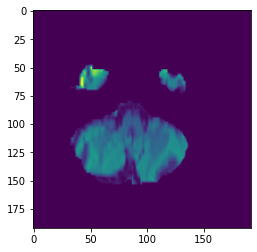

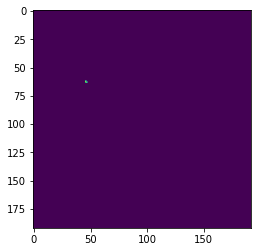

In [37]:

print(slice_data[0]['image'][0].shape)
print(slice_data[0]['label'][0].shape)
plt.figure()
plt.imshow(slice_data[0]['image'][0].astype('float'))
plt.figure()
plt.imshow(slice_data[0]['label'][0].astype('uint8'))
plt.show()